# [9660] Homework # 1 - Exploratory Data Analysis & Data Preparation
Data files:
* Exploratory Data Analysis - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/HepatitisC.csv

## Homework Submission Rules (for all homework assignments)
* Homework is due by 6:05 PM on the due date
  * No late submission will be accepted
* Verify that you are submitting the correct homework file
* Homework file naming convention
  * LastName_FirstName_HwX.ipynb  [Replace X with the homework #]
    * 1 point deducted for submitting homework not complying with naming convention
* Before submission, execute "Kernel -> Restart Kernel and Run All Cells"
  * 1 point deducted for not submitting a cleanly executed notebook

## Homework #1 Requirements
* Load data and examine data
* Generate summary statistics
* Display bar graph showing the distribution of the classes of the dependent variable
* Identify missing values and use SimpleImputer to replace missing values
* Generate one-hot encodings
* Perform label encoding
* Display correlation matrix for all variables
* Standardize independent variables

#### NOTE: Final dataframe must be ready for model training (i.e. all numeric and scaled values)

In [ ]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 10/22/24 23:37:53


### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer             # for handling missing data
from sklearn.preprocessing import LabelEncoder       # for encoding label data
from sklearn.preprocessing import StandardScaler     # for standardizing the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Load data

**Hepatitis C Prediction Dataset**  
The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data  

All attributes except category and gender are numeric.

Dependent variable
* category : values = 'Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'

Independent variables (demographic)
* age (in years)
* gender (f,m)  

Independent variables (lab data)
* ALB
* ALP
* ALT
* AST
* BIL
* CHE
* CHOL
* CREA
* GGT
* PROT


In [ ]:
# Read data file (HepatitisC.csv) into a dataframe
#  NOTE: field separator is ';'
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/HepatitisC.csv', sep=';')

### Examine data

In [ ]:
# Display dataframe shape
df.shape


(612, 13)

In [ ]:
# Display first few rows of dataframe
df.head()

,category,age,gender,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Blood Donor,32.0,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Blood Donor,32.0,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Blood Donor,32.0,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Blood Donor,32.0,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Blood Donor,32.0,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Generate summaty statistics on data

In [ ]:
df.describe()

,age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,599.000000,612.000000,596.000000,612.000000,612.000000,612.000000,612.000000,604.000000,612.000000,612.000000,612.000000
mean,47.328881,41.650000,68.304027,28.377124,34.629902,11.004902,8.206487,5.367053,81.258333,39.295752,72.047549
std,10.055882,5.721926,26.045538,25.470818,33.010979,17.100164,2.193388,1.133375,49.858320,54.575007,5.391748
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.275000,6.937500,4.607500,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.250000,22.950000,25.850000,7.300000,8.265000,5.300000,76.850000,23.300000,72.200000
75%,54.000000,45.225000,80.125000,32.925000,32.825000,11.200000,9.600000,6.065000,88.000000,40.125000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


### Generate insights on the dependent variable
#### Dependent  variable is 'category'

In [ ]:
# Display the distinct classes
df['category'].unique()

array(['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], dtype=object)

In [ ]:
# Display the distribution counts for each class
df['category'].value_counts()

,count
category,
Blood Donor,540
Cirrhosis,28
Hepatitis,23
Fibrosis,21


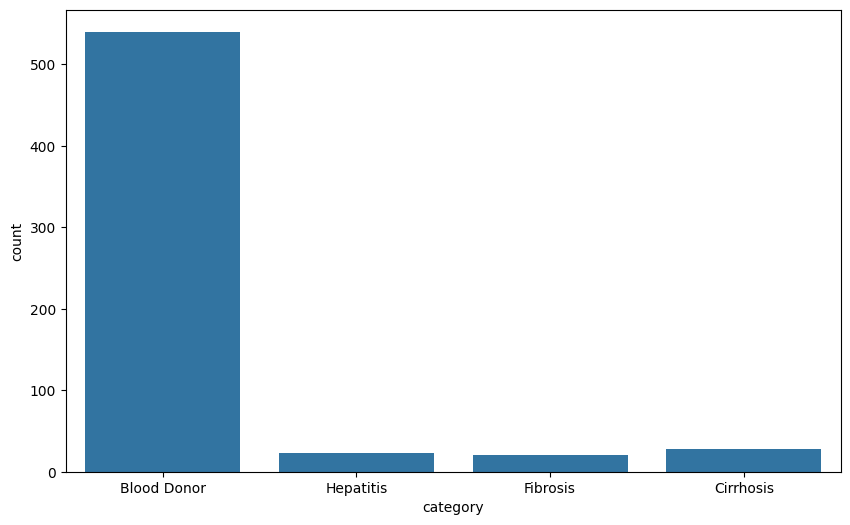

In [ ]:
# Graph (i.e. bar graph) the distribution of the classes
plt.figure(figsize=[10,6])
sns.countplot(x='category', data=df)
plt.show()

### Check for missing values

In [ ]:
df.isnull().sum()

,0
category,0
age,13
gender,19
ALB,0
ALP,16
ALT,0
AST,0
BIL,0
CHE,0
CHOL,8


#### Use the SimpleImputer to replace missing values

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
df['age'] = imp_mean.fit_transform(df[['age']])
df['ALP'] = imp_mean.fit_transform(df[['ALP']])
df['CHOL'] = imp_mean.fit_transform(df[['CHOL']])

In [ ]:
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
cols_to_impute_3 = ['gender']
df[cols_to_impute_3] = imp_most_freq.fit_transform(df[cols_to_impute_3])

### Recheck missing values

In [ ]:
df.isnull().sum()

,0
category,0
age,0
gender,0
ALB,0
ALP,0
ALT,0
AST,0
BIL,0
CHE,0
CHOL,0


### Generate one-hot encodings for 'gender' column

In [ ]:
# Generate encodings for 'gender'
cols_to_one_hot_encode = ['gender']
df = pd.get_dummies(df, columns=cols_to_one_hot_encode, dtype=int)
df.head()


,category,age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,gender_f,gender_m
0,Blood Donor,32.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,Blood Donor,32.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,Blood Donor,32.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,Blood Donor,32.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,Blood Donor,32.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1


### Encode labels

In [ ]:
# Encode 'category' column
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
df['category'].value_counts()

,count
category,
0,540
1,28
3,23
2,21


### Display the correlation matrix for the independent variables

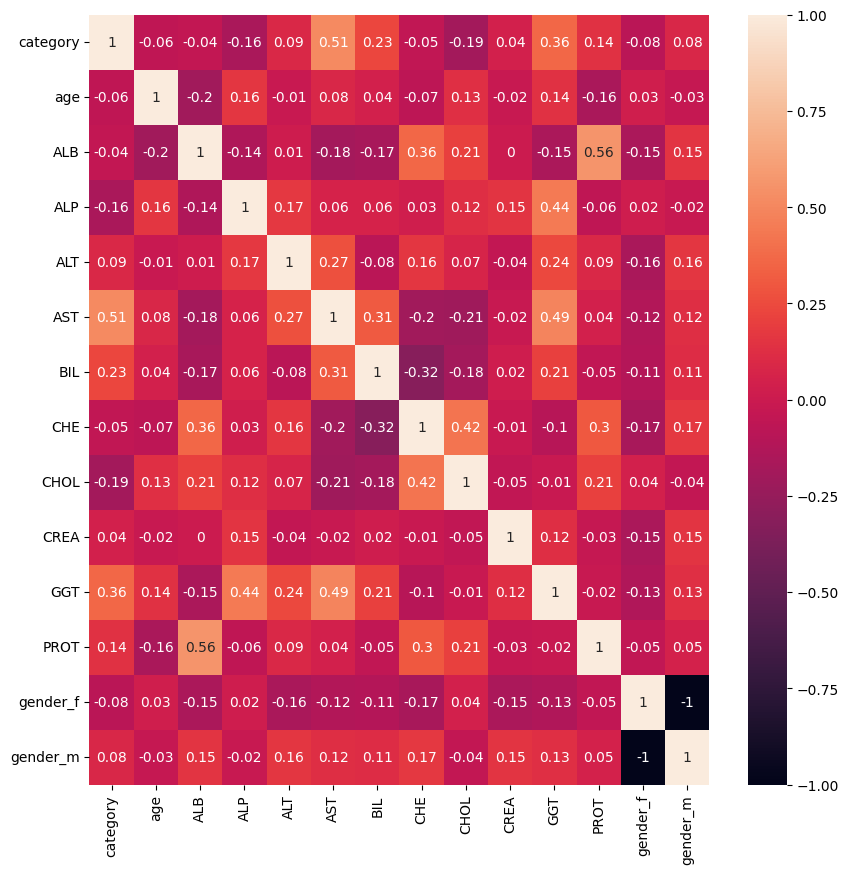

In [ ]:
# Display full correlation matrix
plt.figure(figsize=(10,10))
# Calculate the linear relationships between the variables
correlation_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(correlation_matrix, annot = True)
plt.show()

### Display the first few rows of updated dataframe

In [ ]:
df.head()

,category,age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,gender_f,gender_m
0,0,32.0,-0.550964,-0.615392,-0.812461,-0.379878,-0.205131,-0.582446,-1.899585,0.496645,-0.498726,-0.565687,0,1
1,0,32.0,-0.550964,0.077721,-0.407746,-0.301052,-0.415827,1.352217,-0.504043,-0.145698,-0.434542,0.826465,0,1
2,0,32.0,0.918274,0.249052,0.307382,0.544813,-0.287068,0.289065,-0.148490,0.095181,-0.111786,1.346202,0,1
3,0,32.0,0.271109,-0.634861,0.087343,-0.364719,0.462075,-0.399931,-0.557375,-0.025259,-0.100783,0.677969,0,1
4,0,32.0,-0.428528,0.225689,0.165928,-0.298020,-0.082224,0.430514,-0.930705,-0.105552,-0.172303,-0.621373,0,1


### Standardize independent variables

In [ ]:
cols_to_standardize = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'age', 'gender_f', 'gender_m']

scaler = StandardScaler()

df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])



### NOTE: Final dataframe must be ready for model training (i.e. all numeric and scaled values)

### Display a sample of 25 rows from the final updated dataframe

In [ ]:
df.sample(25)

,category,age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,gender_f,gender_m
113,0,-0.536094,-0.620928,7.941972e-01,0.719956,0.071856,0.087503,-0.431871,1.238164e+00,-0.547163,-0.383195,0.009736,-0.781362,0.781362
482,0,0.671125,-0.306091,-1.464260e+00,-0.447038,-0.464768,-0.275363,-0.555069,-3.707104e-01,-0.266138,-0.476720,-0.250132,1.279817,-1.279817
558,3,1.073532,0.236128,1.199162e+00,-0.635643,0.866181,0.116767,-1.029609,6.959466e-01,1.325670,8.283531,-1.196796,-0.781362,0.781362
380,0,-0.435492,0.428528,-1.047614e+00,-0.423463,-0.449609,-0.210983,-0.313236,6.070585e-01,-0.246064,-0.330013,0.213918,1.279817,-1.279817
430,0,0.067516,-0.725873,7.786216e-01,-0.537412,-0.455673,-0.328037,0.489832,-6.107082e-01,-0.406650,-0.495059,-0.769869,1.279817,-1.279817
427,0,0.067516,-1.687874,-7.803464e-02,-0.557058,-0.404132,-0.322184,-1.590844,-1.218238e-01,-0.808115,-0.405201,-1.196796,1.279817,-1.279817
252,0,0.872329,-0.393546,1.152435e+00,-0.006960,-0.301052,-0.298774,1.000875,1.104832e+00,0.014888,-0.394198,0.380977,-0.781362,0.781362
16,0,-1.441509,-0.131182,1.828561e-01,-0.439180,-0.355624,-0.058814,-0.559632,-1.307126e-01,0.175474,-0.451047,0.065422,-0.781362,0.781362
508,0,1.073532,-1.110674,8.993322e-01,-0.537412,-0.413228,0.409401,-0.742147,1.270629e-01,-0.426724,-0.533569,-0.305819,1.279817,-1.279817
74,0,-0.938501,-0.078709,-9.541603e-01,-0.333089,-0.428387,-0.052961,-1.029609,-1.295146e+00,-0.366504,0.577737,-0.862680,-0.781362,0.781362
